In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
ari_results = []

# Load CSV files into DataFrames (replace with actual file paths)
csv_files = ['results/sv7/experiment_summary.csv','results/tpot-chs/experiment_summary.csv', 'results/tpot-dbs/experiment_summary.csv', 'results/tpot-sil/experiment_summary.csv', 'results/tpe-autoclust/experiment_summary.csv', 'results/tpot-poac_sv6/experiment_summary.csv', 'results/tpot-tpe_metadataset/experiment_summary.csv', 'results/ml2dac/experiment_summary.csv']
# Step 1: Loop through each CSV file
for file in csv_files:
    # Step 2: Load the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Step 3: Extract the dataset name (algorithm) and ARI (adjusted_rand_score)
    # Assuming 'Dataset' and 'adjusted_rand_score' are the relevant columns
    
    ari_value = df['adjusted_rand_score'].mean()  # Calculate the average ARI if there are multiple rows
    optimization_name = file.split('/')[1]  # Extract the second-to-last part of the path

    # Step 4: Append the result to the list
    ari_results.append({'Optimization': optimization_name, 'ARI': ari_value})

# Step 5: Create a DataFrame to display the results
ari_df = pd.DataFrame(ari_results)
ari_df_sorted = ari_df.sort_values(by='ARI', ascending=False)
ari_df_sorted = ari_df_sorted.reset_index(drop=True)
ari_df_sorted


,Optimization,ARI
0,tpot-poac_sv6,0.301522
1,tpot-chs,0.279117
2,sv7,0.278151
3,ml2dac,0.273067
4,tpot-tpe_metadataset,0.263337
5,tpot-sil,0.255351
6,tpot-dbs,0.208024
7,tpe-autoclust,0.153711


In [21]:
import pandas as pd
import glob

# Initialize an empty dictionary to hold ARI scores for each dataset
ari_results = {}

# Dynamically find all CSV files named "experiment_summary.csv" in the results folder
csv_files = glob.glob('results/**/experiment_summary.csv', recursive=True)

# Step 1: Loop through each CSV file found
for file in csv_files:
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Extract the algorithm name dynamically from the file path
    optimization_name = file.split('/')[-2]  # The folder containing the CSV file

    # Step 2: Loop through each dataset in the file
    for _, row in df.iterrows():
        # Remove '.csv' from dataset name if present
        dataset_name = row['Dataset'].replace('.csv', '')  
        ari_value = row['adjusted_rand_score']  
        
        # If the dataset is not already in the results, add it
        if dataset_name not in ari_results:
            ari_results[dataset_name] = {}
        
        # Add the ARI score for this algorithm and limit to 4 decimals
        ari_results[dataset_name][optimization_name] = round(ari_value, 4)

# Step 3: Convert the results dictionary into a DataFrame
ari_df = pd.DataFrame.from_dict(ari_results, orient='index').reset_index()
ari_df.rename(columns={'index': 'Dataset'}, inplace=True)

# Step 4: Sort datasets alphabetically and ensure columns are sorted by ARI
ari_df = ari_df.sort_values(by='Dataset').reset_index(drop=True)

# Step 5: Display the formatted DataFrame with 4 decimal places
pd.set_option('display.float_format', '{:.4f}'.format)
result = ari_df[['Dataset','tpot-dbs','tpot-chs','tpot-sil','tpe-autoclust','tpot-tpe_metadataset','ml2dac','tpot-poac_sv6', 'sv7']]


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from autorank import autorank, plot_stats, create_report, latex_table

np.random.seed(42)
pd.set_option('display.max_columns', 7)
std = 0.3
result

,Dataset,tpot-dbs,tpot-chs,tpot-sil,tpe-autoclust,ml2dac,sv7
0,3-spiral,0.1146,0.1170,-0.0059,0.0317,0.0849,-0.0043
1,R15,0.2308,0.1452,0.2168,0.1974,0.2637,0.2201
2,aggregation,0.4336,0.7623,0.1877,0.5187,0.8226,0.4214
3,arrhythmia,0.0108,0.0181,0.0376,0.0045,0.0337,0.0432
4,cluto-t7-10k,0.4067,0.3037,0.4067,0.2371,0.1812,0.5656
5,cluto-t8-8k,0.4394,0.3850,0.4577,0.2193,0.5303,0.3085
6,compound,0.4841,0.5152,0.4681,0.3959,0.2127,0.4681
7,ecoli,0.2243,0.3857,0.0044,0.1297,0.1535,0.0380
8,glass,0.1810,0.1339,0.2463,0.0720,0.1251,0.2137
9,haberman,0.0085,0.0085,-0.0040,0.0027,0.0323,-0.0040


In [19]:
autorank_result = autorank(result.drop(columns=["Dataset"]), alpha=0.05, verbose=False)
print(autorank_result)

RankResult(rankdf=
               meanrank  median    mad ci_lower ci_upper effect_size  \
tpe-autoclust    4.9000  0.0952 0.0758   0.0175   0.5187      0.0000   
tpot-dbs         3.4000  0.1798 0.1050   0.0108   0.5998     -0.6235   
tpot-sil         3.3000  0.2315 0.1917   0.0044   0.6056     -0.6310   
ml2dac           3.2500  0.1393 0.1096   0.0271   0.9267     -0.3157   
tpot-chs         3.1250  0.1869 0.1628   0.0181   0.9035     -0.4870   
sv7              3.0250  0.2169 0.1768   0.0090   0.8846     -0.6034   

                magnitude  
tpe-autoclust  negligible  
tpot-dbs           medium  
tpot-sil           medium  
ml2dac              small  
tpot-chs            small  
sv7                medium  
pvalue=0.014635128077420439
cd=1.6858868030743444
omnibus=friedman
posthoc=nemenyi
all_normal=False
pvals_shapiro=[np.float64(0.023444997154354212), np.float64(0.001525430359344598), np.float64(0.036144485244327784), np.float64(0.04334485536647885), np.float64(0.00397370786853967

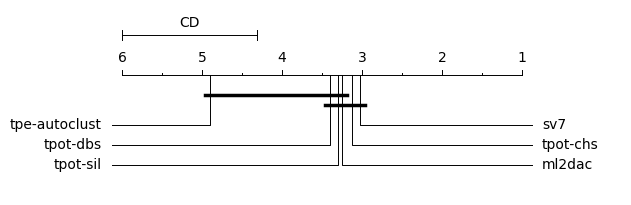

In [20]:
plot_stats(autorank_result)
plt.savefig('frameworks_nemenyi.pdf', format='pdf', dpi=300, bbox_inches='tight')  # You can change 'feature_importances.pdf' to your desired filename
plt.show()

In [18]:
# Step 5: Bold the highest value in each row (LaTeX formatting)
def highlight_max_latex(row):
    max_value = row.max()
    # Return a pandas Series instead of a list to avoid shape mismatch
    return row.apply(lambda x: f"\\textbf{{{x:.4f}}}" if x == max_value else f"{x:.4f}")

# Apply the function correctly using `apply` with axis=1
ari_df_formatted = ari_df.copy()
ari_df_formatted.iloc[:, 1:] = ari_df.iloc[:, 1:].apply(highlight_max_latex, axis=1)

# Step 6: Export the formatted DataFrame to LaTeX
latex_table = ari_df_formatted[['Dataset','tpot-dbs','tpot-chs','tpot-sil','tpe-autoclust','tpot-tpe_metadataset','ml2dac','tpot-poac_sv6']].to_latex(
    index=False,
    escape=False,  # Allow LaTeX commands like \textbf{} to work
    caption="ARI Scores for Various Clustering Algorithms",
    label="tab:ari_scores",
    column_format="lccccccc"
)

# Save the LaTeX table to a file
with open("ari_results_table.tex", "w") as f:
    f.write(latex_table)

# Display the LaTeX code for review
print(latex_table)


\begin{table}
\caption{ARI Scores for Various Clustering Algorithms}
\label{tab:ari_scores}
\begin{tabular}{lccccccc}
\toprule
Dataset & tpot-dbs & tpot-chs & tpot-sil & tpe-autoclust & tpot-tpe_metadataset & ml2dac & tpot-poac_sv6 \\
\midrule
3-spiral & 0.1146 & \textbf{0.1170} & -0.0059 & 0.0317 & -0.0059 & 0.0849 & -0.0058 \\
R15 & 0.2308 & 0.1452 & 0.2168 & 0.1974 & 0.0431 & \textbf{0.2637} & 0.1452 \\
aggregation & 0.4336 & 0.7623 & 0.1877 & 0.5187 & 0.3358 & \textbf{0.8226} & 0.5823 \\
arrhythmia & 0.0108 & 0.0181 & 0.0376 & 0.0045 & \textbf{0.2460} & 0.0337 & 0.0111 \\
cluto-t7-10k & 0.4067 & 0.3037 & 0.4067 & 0.2371 & 0.4089 & 0.1812 & \textbf{0.4368} \\
cluto-t8-8k & 0.4394 & 0.3850 & 0.4577 & 0.2193 & 0.3892 & \textbf{0.5303} & 0.4336 \\
compound & 0.4841 & 0.5152 & 0.4681 & 0.3959 & 0.7041 & 0.2127 & \textbf{0.7402} \\
ecoli & 0.2243 & 0.3857 & 0.0044 & 0.1297 & 0.2276 & 0.1535 & \textbf{0.3863} \\
glass & 0.1810 & 0.1339 & \textbf{0.2463} & 0.0720 & 0.0139 & 0.1251 & 0.2326

/tmp/ipykernel_53552/3625955212.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0             -0.0058
1              0.1452
2              0.5823
3              0.0111
4     \textbf{0.4368}
5              0.4336
6     \textbf{0.7402}
7     \textbf{0.3863}
8              0.2326
9              0.0143
10             0.0090
11    \textbf{0.5681}
12    \textbf{1.0000}
13             0.3985
14             0.0002
15             0.3486
16             0.3956
17            -0.0045
18             0.0148
19             0.3235
Name: tpot-poac_sv6, dtype: object' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ari_df_formatted.iloc[:, 1:] = ari_df.iloc[:, 1:].apply(highlight_max_latex, axis=1)
/tmp/ipykernel_53552/3625955212.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0     0.0317
1     0.1974
2     0.51

In [14]:
# Export the DataFrame to LaTeX format (sorted columns order specified)
latex_table = ari_df[['Dataset','tpot-dbs','tpot-chs','tpot-sil','tpe-autoclust','tpot-tpe_metadataset','ml2dac','tpot-poac_sv6']].to_latex(
    index=False,  # Do not include the index column in the LaTeX table
    float_format="%.4f",  # Limit decimal precision to 4 places
    caption="ARI Scores for Various Clustering Algorithms",  # Add a caption for the table
    label="tab:ari_scores",  # Add a label for referencing in LaTeX
    column_format="lccccccc"  # Alignments: left for Dataset, centered for scores
)

# Save the LaTeX table to a .tex file
with open("ari_results_table.tex", "w") as f:
    f.write(latex_table)

# Display the LaTeX code for review
print(latex_table)


\begin{table}
\caption{ARI Scores for Various Clustering Algorithms}
\label{tab:ari_scores}
\begin{tabular}{lccccccc}
\toprule
Dataset & tpot-dbs & tpot-chs & tpot-sil & tpe-autoclust & tpot-tpe_metadataset & ml2dac & tpot-poac_sv6 \\
\midrule
3-spiral & 0.1146 & 0.1170 & -0.0059 & 0.0317 & -0.0059 & 0.0849 & -0.0058 \\
R15 & 0.2308 & 0.1452 & 0.2168 & 0.1974 & 0.0431 & 0.2637 & 0.1452 \\
aggregation & 0.4336 & 0.7623 & 0.1877 & 0.5187 & 0.3358 & 0.8226 & 0.5823 \\
arrhythmia & 0.0108 & 0.0181 & 0.0376 & 0.0045 & 0.2460 & 0.0337 & 0.0111 \\
cluto-t7-10k & 0.4067 & 0.3037 & 0.4067 & 0.2371 & 0.4089 & 0.1812 & 0.4368 \\
cluto-t8-8k & 0.4394 & 0.3850 & 0.4577 & 0.2193 & 0.3892 & 0.5303 & 0.4336 \\
compound & 0.4841 & 0.5152 & 0.4681 & 0.3959 & 0.7041 & 0.2127 & 0.7402 \\
ecoli & 0.2243 & 0.3857 & 0.0044 & 0.1297 & 0.2276 & 0.1535 & 0.3863 \\
glass & 0.1810 & 0.1339 & 0.2463 & 0.0720 & 0.0139 & 0.1251 & 0.2326 \\
haberman & 0.0085 & 0.0085 & -0.0040 & 0.0027 & 0.0143 & 0.0323 & 0.0143 \\
i

/tmp/ipykernel_53552/114620044.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Algorithm', y='ARI', data=ari_long, palette="muted", width=0.7,


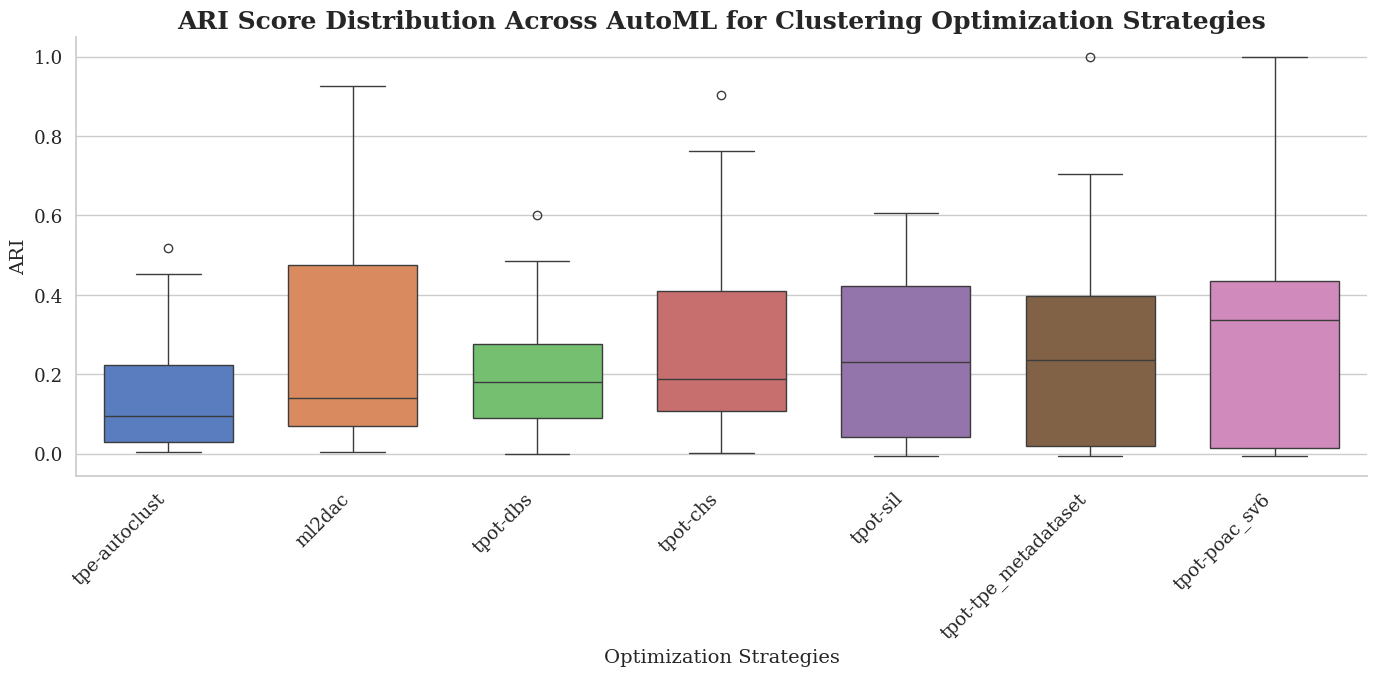

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the DataFrame to long format for easier plotting
ari_long = ari_df.melt(id_vars='Dataset', var_name='Algorithm', value_name='ARI')

# Calculate the median ARI per algorithm to sort them
median_ari = ari_long.groupby('Algorithm')['ARI'].median().sort_values()

# Set a scientific style with serif fonts for a professional look
sns.set_theme(style="whitegrid", font_scale=1.2, rc={"font.family": "serif"})
plt.figure(figsize=(14, 7))

# Enhanced boxplot, ordered by median ARI
sns.boxplot(x='Algorithm', y='ARI', data=ari_long, palette="muted", width=0.7, 
            order=median_ari.index)  # Order by median ARI values

# Title and labels with scientific clarity
plt.title('ARI Score Distribution Across AutoML for Clustering Optimization Strategies', fontsize=18, weight='bold')
plt.ylabel('ARI', fontsize=14)
plt.xlabel('Optimization Strategies', fontsize=14)
plt.xticks(rotation=45, ha="right")

# Remove top and right borders for a cleaner look
sns.despine()

# Save for high-quality use in scientific papers
plt.tight_layout()
plt.savefig("ari_distribution_plot_sorted.pdf", dpi=300, bbox_inches='tight')
plt.show()
